# Import libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [30]:
#conda install -c conda-forge mlxtend
!pip install mlxtend

###### we have use Book.csv dataset file for solve this problem

### Step 1: Collecting Data and pre-processing

In [31]:
book = pd.read_csv('D:/EXCLER solution/ASSIGNMENT/Association Rules/book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [32]:
book.shape

(2000, 11)

In [33]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [34]:
book.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


# Pre-Processing

As the data is not in transaction formation We are using transaction Encoder

In [35]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Apriori Algorithm

## i) Association rules with 10% Support and 70% confidence

In [36]:
# With 10% Support
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [37]:
# with 70% confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [38]:
#####  An leverage value of 0 indicates independence. Range will be [-1 1]
# high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

# Sorting Value By Decending Order

In [39]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [40]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


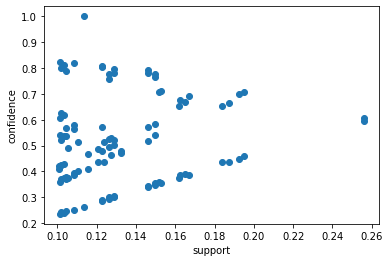

In [41]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# ii) Association rules with 15% Support and 85% confidence

In [42]:
# With 15% Support
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [43]:
# with 80% confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.85)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [44]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


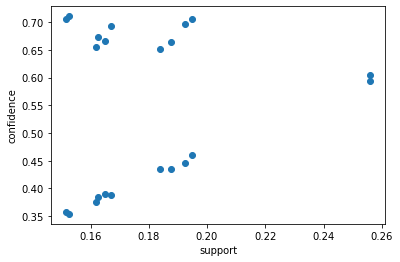

In [45]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# iii) Association rules for Support 5% & confidence 90%


In [46]:
# With 5% Support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, CookBks, GeogBks)"
96,0.0560,"(YouthBks, ArtBks, CookBks, GeogBks)"
97,0.0650,"(ArtBks, DoItYBks, CookBks, GeogBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [47]:
# with 80% confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(ArtBks, DoItYBks, CookBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(DoItYBks),"(ArtBks, CookBks, GeogBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
659,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(CookBks),"(ArtBks, DoItYBks, GeogBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789


In [48]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
185,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
180,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
511,"(CookBks, GeogBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
510,"(ItalCook, ChildBks)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
512,"(CookBks, ChildBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
509,"(GeogBks, ItalCook)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
640,"(ArtBks, CookBks, ChildBks)","(DoItYBks, GeogBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271
653,"(DoItYBks, GeogBks)","(ArtBks, CookBks, ChildBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047
514,(ItalCook),"(CookBks, GeogBks, ChildBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488
507,"(CookBks, GeogBks, ChildBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307


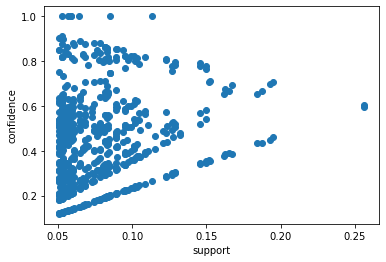

In [49]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()